### Handwritten Digit recognition

#### Data Collection

##### importing the required packages

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the MNIST dataset

In [ ]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [ ]:
## load_data -- return value is two tuples train,test
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


There are 60000 images in the training data.each image size is 28*28

In [ ]:
print(test_digits.shape)

(10000, 28, 28)


There are 10 classes . from class 0 to class 9

In [ ]:
print(train_labels.shape)

(60000,)


Class wise images count

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

image count for each label in test data

In [ ]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

## EDA

Display few images with labels

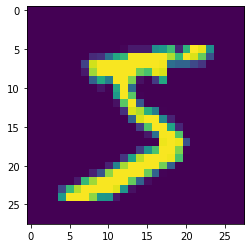

In [ ]:
plt.imshow(train_digits[0])

Text(0.5, 1.0, 'Digits5')

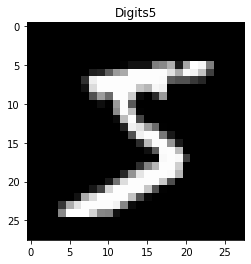

In [ ]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digits"+str(train_labels[0]))

In [ ]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [ ]:
28*28

784

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

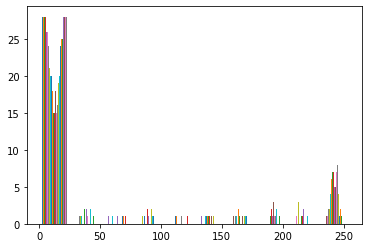

In [ ]:
plt.hist(train_digits[0])

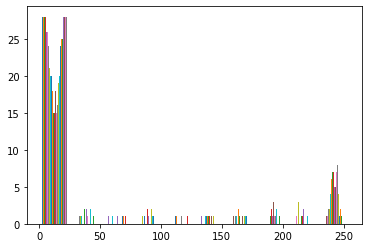

In [ ]:
plt.hist(train_digits[0])
plt.show()

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

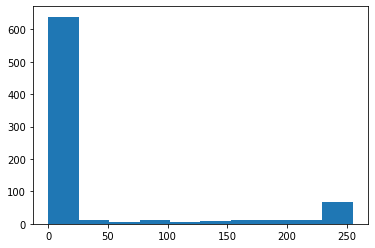

In [ ]:
plt.hist(train_digits[0].flat)

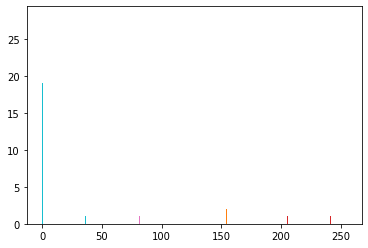

In [ ]:
plt.hist(train_digits[0],bins=255)
plt.show()

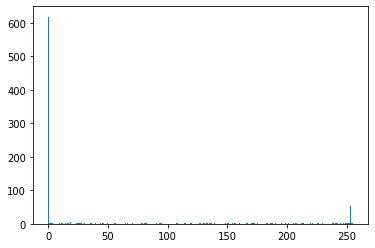

In [ ]:
plt.hist(train_digits[0].flat,bins=255)
plt.show()

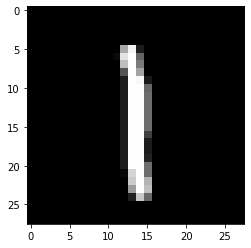

In [ ]:
plt.imshow(train_digits[14],cmap='gray')

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

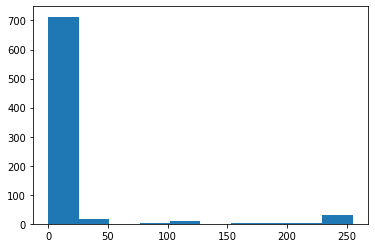

In [ ]:
## pixel distribution of digit 1
plt.hist(train_digits[14].flat)

In [ ]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

In [ ]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([24107, 23776, 54591, 37427, 57998, 27207, 18614, 26856, 21904,
        5311, 38372, 26896,  1665, 18082, 55484,  1356])

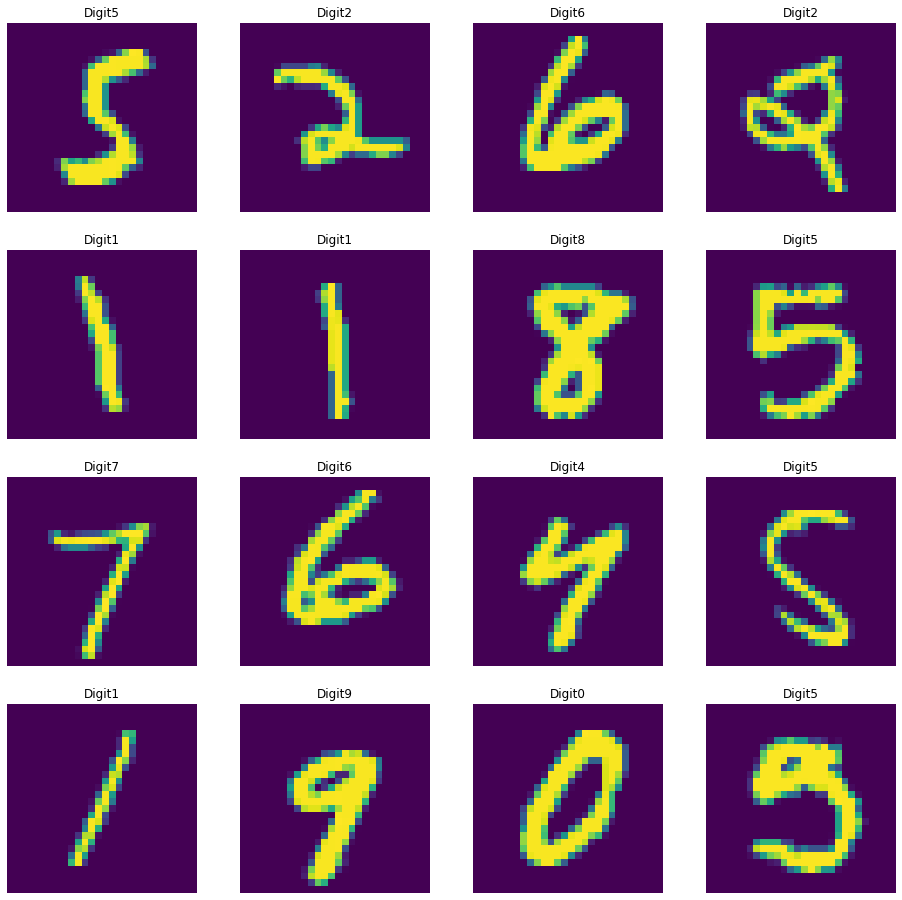

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit"+str(train_labels[i]))
  plt.axis('off')
  j+=1

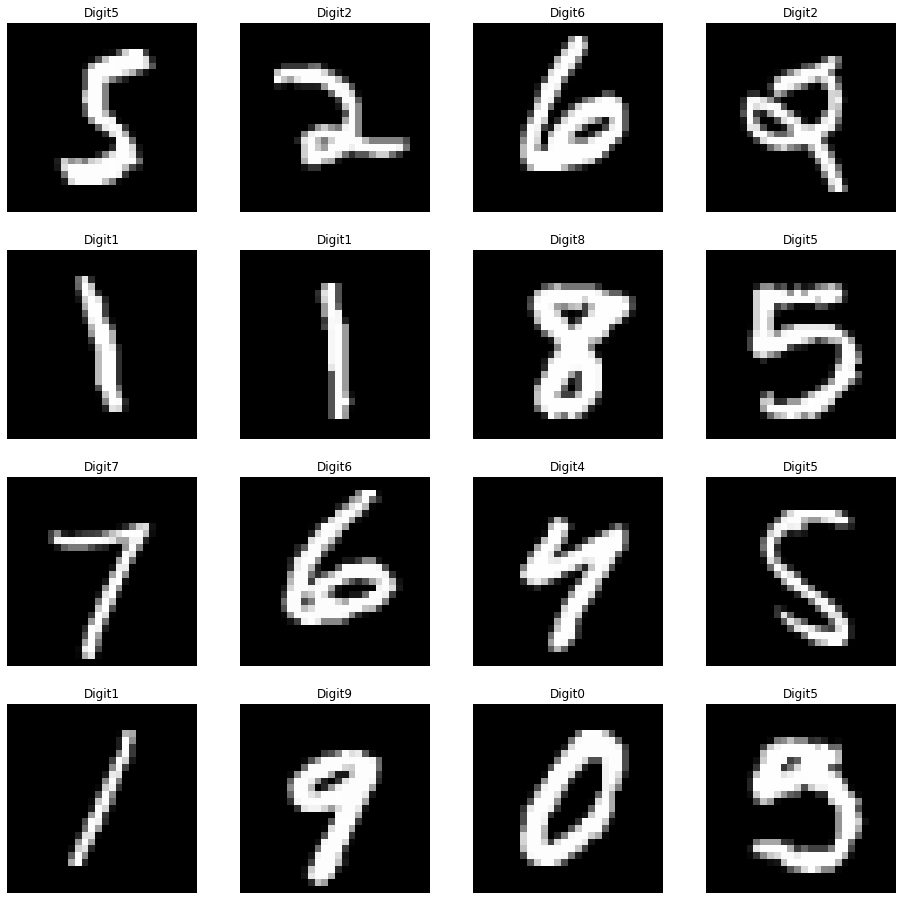

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit"+str(train_labels[i]))
  plt.axis('off')
  j+=1

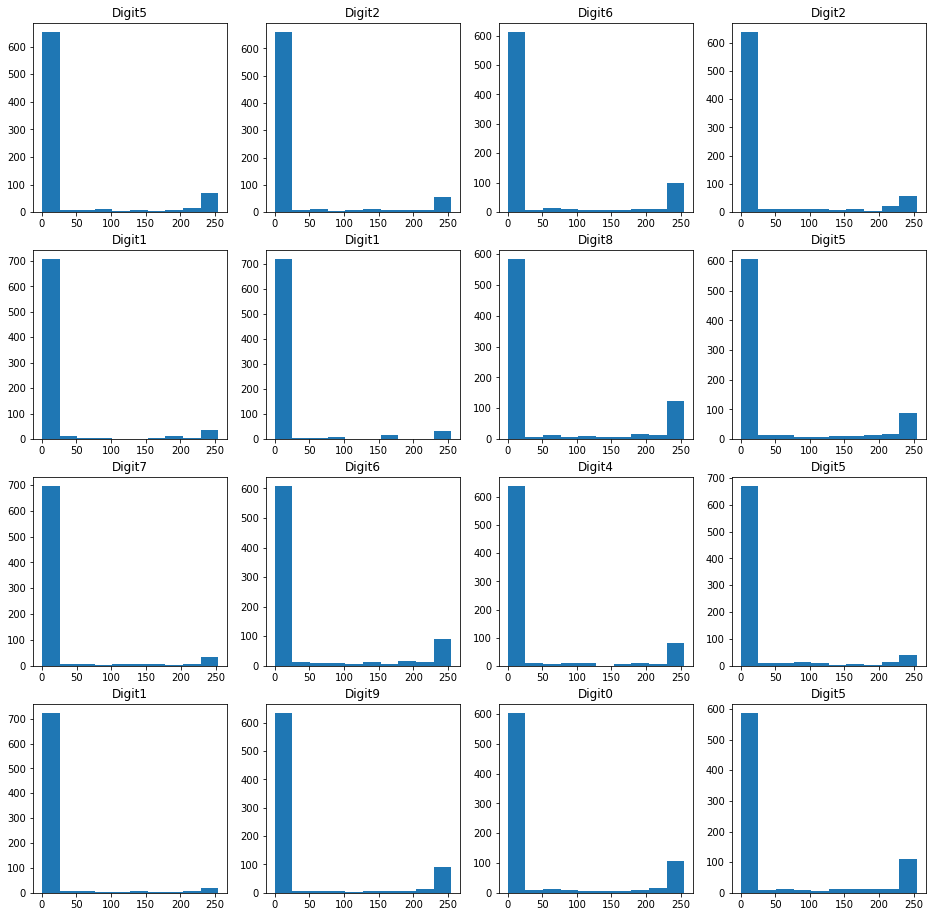

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit"+str(train_labels[i]))
 # plt.axis('off')
  j+=1

### Preprocessing

##### Scaling

In [ ]:
train_digits_sc = train_digits/255.0
test_digits_sc = test_digits/255.0

Convert labels to categorical values

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_cat = to_categorical(train_labels)

In [ ]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Split the train data to train and validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)


### Build and Train the model

### Build the model
We need to take 1d array as input for Dense layer.<br>
How many hidden layers you want to add here?<br>
How many neurons in each hidden layer?<br>
what is activation function for the hidden layers?<br>
how many neurons we should take in the output layer?<br>
what is the activation function for the output layer?

Build the model

In [ ]:
## import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [ ]:
784*128+ 128

100480

In [ ]:
## We are creating the base model
model = Sequential()
# first layer we need to mention the input shape
model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense.128 neurons in the layers
model.add(Dense(128,activation='relu')) #784*128+ 128
model.add(Dense(128,activation='relu')) #128*128 +128
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
# Final layer there are 10 classes so use 10 neurons
model.add(Dense(10,activation='softmax')) # relu --> 1 or 0 for multiple node you will get 1
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

### Compile the model
what is the loss function?<br>
what is the optimizer?<br>
what are the metrcs?

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

### Training the model

In [ ]:
history = model.fit(x=X_train,y=y_train,epochs=10,\
                    validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.2515 - accuracy: 0.9225 - val_loss: 0.1316 - val_accuracy: 0.9618
Epoch 2/10
54000/54000 [==============================] - 6s 116us/step - loss: 0.1098 - accuracy: 0.9660 - val_loss: 0.1040 - val_accuracy: 0.9703
Epoch 3/10
54000/54000 [==============================] - 6s 115us/step - loss: 0.0789 - accuracy: 0.9755 - val_loss: 0.1098 - val_accuracy: 0.9712
Epoch 4/10
54000/54000 [==============================] - 6s 117us/step - loss: 0.0639 - accuracy: 0.9801 - val_loss: 0.1098 - val_accuracy: 0.9690
Epoch 5/10
54000/54000 [==============================] - 6s 120us/step - loss: 0.0539 - accuracy: 0.9832 - val_loss: 0.1310 - val_accuracy: 0.9650
Epoch 6/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.0451 - accuracy: 0.9852 - val_loss: 0.1029 - val_accuracy: 0.9723
Epoch 7/10
54000/54000 [==============================] - 6s 11

In [ ]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.0987635317595923, 0.9757000207901001]

In [ ]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [ ]:
test_labels[0]

7

In [ ]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))


array([[7.4857232e-13, 9.4906243e-09, 8.5639194e-08, 4.6063636e-08,
        1.7852508e-12, 8.1774777e-14, 1.5185538e-16, 9.9999988e-01,
        3.5280542e-10, 2.5715458e-08]], dtype=float32)

In [ ]:
model.predict(test_digits_sc[:10])

array([[7.48575139e-13, 9.49064205e-09, 8.56395204e-08, 4.60638105e-08,
        1.78525760e-12, 8.17757117e-14, 1.51856543e-16, 9.99999881e-01,
        3.52806784e-10, 2.57156074e-08],
       [2.11400949e-12, 5.19570431e-09, 1.00000000e+00, 6.72725209e-10,
        2.44756017e-12, 8.50210093e-13, 1.43258845e-13, 9.66482006e-10,
        3.31549892e-12, 1.13760582e-14],
       [1.89828171e-11, 9.99999762e-01, 2.05901660e-08, 2.91359402e-11,
        4.99176211e-09, 2.59415371e-11, 1.46315723e-10, 1.40239305e-08,
        2.74971853e-07, 2.26129893e-10],
       [1.00000000e+00, 6.37088581e-14, 7.10239978e-10, 1.76345466e-10,
        3.32294747e-10, 2.25218399e-09, 4.33942020e-08, 5.42628789e-12,
        7.59753416e-09, 1.56322706e-08],
       [1.12563100e-06, 3.44893233e-05, 9.36438846e-06, 4.20633413e-08,
        9.99094009e-01, 1.40507973e-06, 1.88554004e-05, 1.71912790e-04,
        8.58549299e-07, 6.68037566e-04],
       [7.28665912e-12, 9.99999642e-01, 8.38797831e-09, 3.86720933e-11,
   

In [ ]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [ ]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[7.4857232e-13, 9.4906243e-09, 8.5639194e-08, 4.6063636e-08,
        1.7852508e-12, 8.1774777e-14, 1.5185538e-16, 9.9999988e-01,
        3.5280542e-10, 2.5715458e-08]], dtype=float32)

In [ ]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [ ]:
history.history

{'accuracy': [0.92246294,
  0.9660185,
  0.9755185,
  0.9800926,
  0.9832037,
  0.9852037,
  0.9877037,
  0.9892963,
  0.99057406,
  0.9913333],
 'loss': [0.25149503522890587,
  0.10978578328417131,
  0.07893593202890069,
  0.06387804312225327,
  0.05385051726317033,
  0.04511493286865125,
  0.03854519511171384,
  0.035173502809011284,
  0.030406235933670596,
  0.029161191869160608],
 'val_accuracy': [0.9618333578109741,
  0.9703333377838135,
  0.9711666703224182,
  0.968999981880188,
  0.9649999737739563,
  0.9723333120346069,
  0.9785000085830688,
  0.9746666550636292,
  0.9789999723434448,
  0.9756666421890259],
 'val_loss': [0.13163316508879264,
  0.10400204438281556,
  0.10979036837071181,
  0.10976937395147979,
  0.13098481064119066,
  0.1029376487058277,
  0.08165260779003923,
  0.09983259305264801,
  0.09482886047905777,
  0.13365852866585676]}

In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

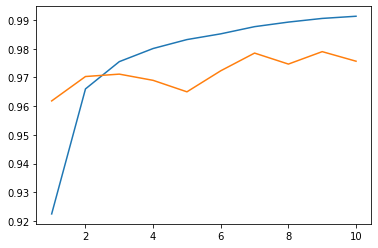

In [ ]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])